<a href="https://colab.research.google.com/github/Dusein/DEVSECOPS/blob/main/Tugas_Perbaikan/Chapter_3_Unsupervised_Learning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

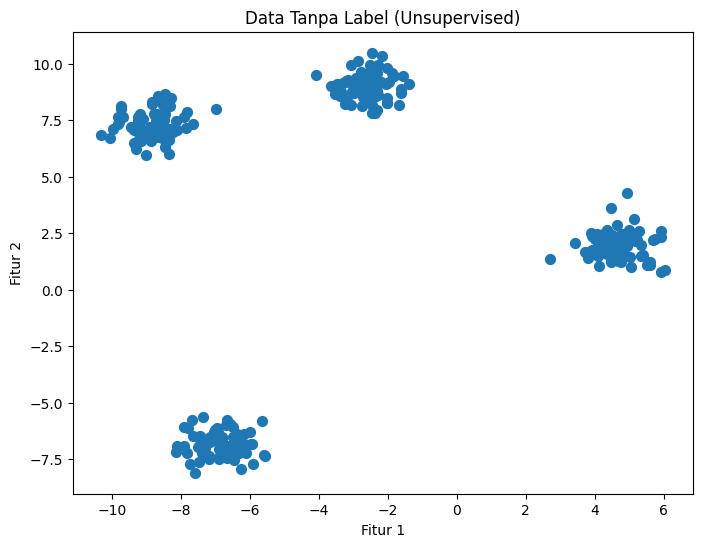

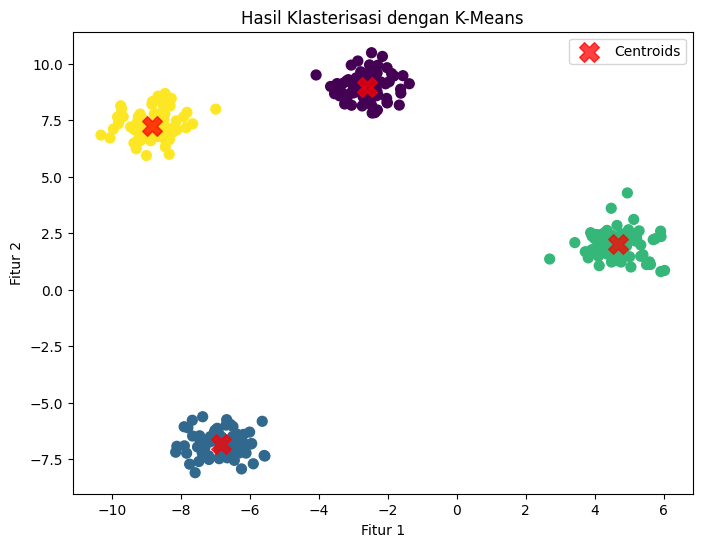

Silhouette Score untuk K-Means: 0.88


In [2]:
# ---------------------------------------------------------
# Bagian 1: Klasterisasi dengan K-Means
# ---------------------------------------------------------

# Membuat dataset sintetis untuk klasterisasi
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualisasi data tanpa label
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Data Tanpa Label (Unsupervised)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Membuat model K-Means dengan 4 klaster
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Menampilkan hasil klasterisasi
y_kmeans = kmeans.predict(X)

# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroids")
plt.title("Hasil Klasterisasi dengan K-Means")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()
plt.show()

# Evaluasi K-Means dengan Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score untuk K-Means: {silhouette_avg:.2f}")

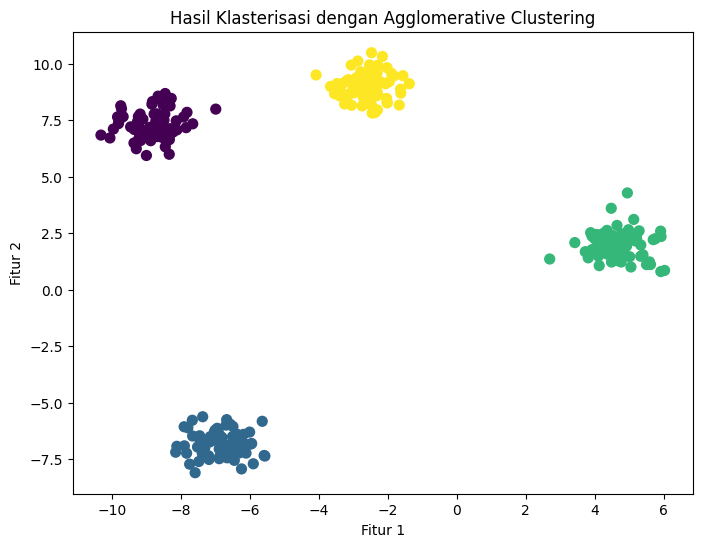

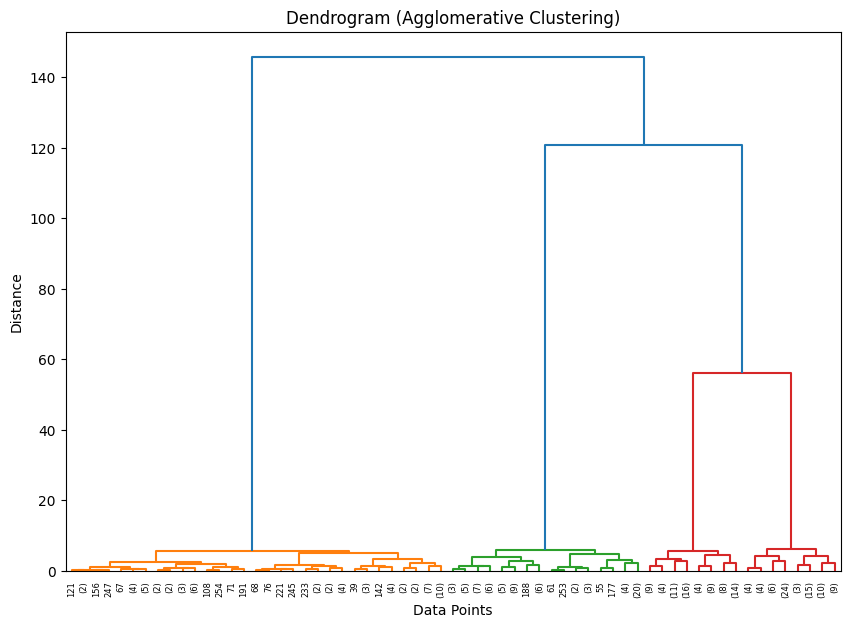

In [3]:
# ---------------------------------------------------------
# Bagian 2: Klasterisasi dengan Agglomerative Clustering
# ---------------------------------------------------------

# Membuat model Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title("Hasil Klasterisasi dengan Agglomerative Clustering")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Membuat dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Agglomerative Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

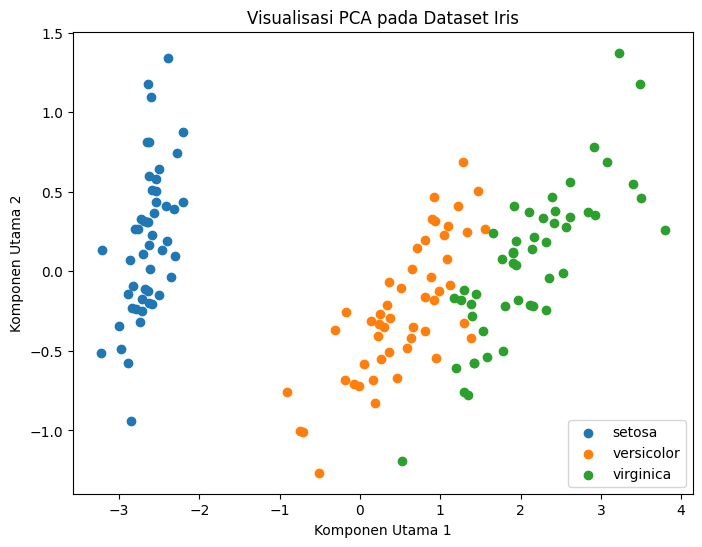

In [4]:
# ---------------------------------------------------------
# Bagian 3: Reduksi Dimensi dengan PCA
# ---------------------------------------------------------

# Memuat dataset Iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Menerapkan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Visualisasi data hasil reduksi dimensi
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y_iris == i, 0], X_pca[y_iris == i, 1], label=target_name)

plt.title("Visualisasi PCA pada Dataset Iris")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend()
plt.show()

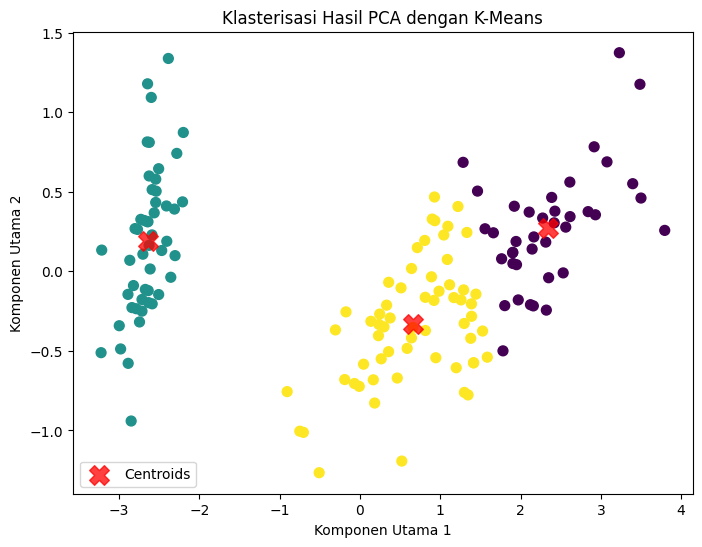

In [5]:
# ---------------------------------------------------------
# Bagian 4: Kombinasi PCA dan K-Means
# ---------------------------------------------------------

# Mereduksi dimensi dataset Iris menjadi 2D menggunakan PCA
X_pca_iris = PCA(n_components=2).fit_transform(X_iris)

# Klasterisasi hasil PCA dengan K-Means
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_iris)

# Visualisasi hasil klasterisasi setelah PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_iris[:, 0], X_pca_iris[:, 1], c=y_kmeans_pca, s=50, cmap='viridis')
centers_pca = kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroids")
plt.title("Klasterisasi Hasil PCA dengan K-Means")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend()
plt.show()

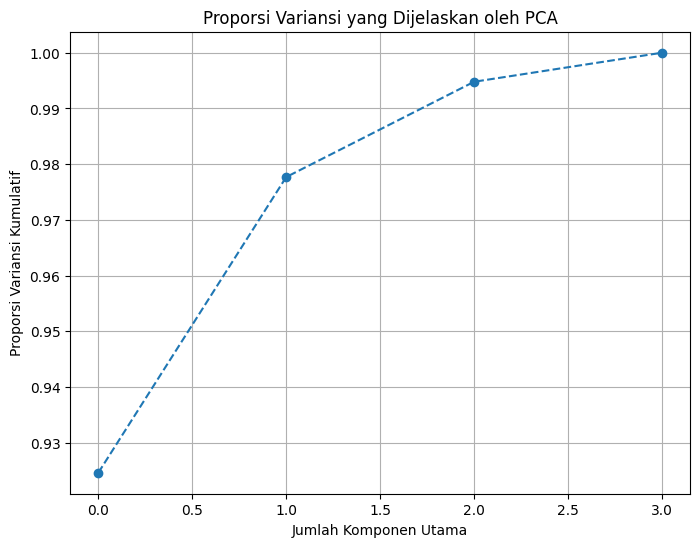

Proporsi Variansi untuk 4 Komponen Utama:
[0.92461872 0.05306648 0.01710261 0.00521218]


In [6]:
# ---------------------------------------------------------
# Analisis Variansi pada PCA
# ---------------------------------------------------------

# Menampilkan proporsi variansi yang dijelaskan oleh setiap komponen
pca_full = PCA().fit(X_iris)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Proporsi Variansi yang Dijelaskan oleh PCA")
plt.xlabel("Jumlah Komponen Utama")
plt.ylabel("Proporsi Variansi Kumulatif")
plt.grid()
plt.show()

print("Proporsi Variansi untuk 4 Komponen Utama:")
print(pca_full.explained_variance_ratio_)

Penjelasan Kode


Bagian 1: K-Means Clustering
Dataset sintetis digunakan untuk ilustrasi klasterisasi.
Algoritma K-Means mempartisi data menjadi 4 klaster, dan hasil divisualisasikan bersama dengan centroid klaster.
Silhouette score digunakan untuk mengevaluasi kualitas klasterisasi.


Bagian 2: Agglomerative Clustering
Agglomerative Clustering adalah teknik klasterisasi hierarkis.
Dendrogram dibuat untuk menunjukkan hierarki pengelompokan data.
Klasterisasi divisualisasikan dalam ruang 2D untuk memahami hasil.


Bagian 3: PCA
PCA diterapkan pada dataset Iris untuk mereduksi dimensi dari 4 fitur menjadi 2 komponen utama.
Variansi yang dijelaskan oleh setiap komponen PCA dianalisis menggunakan cumulative explained variance plot.


Bagian 4: Kombinasi PCA dan K-Means
PCA digunakan untuk mereduksi dimensi dataset Iris sebelum diterapkan klasterisasi K-Means.
Hasil klasterisasi divisualisasikan untuk menunjukkan efek reduksi dimensi terhadap klasterisasi.


Output yang Diharapkan


Hasil Klasterisasi:

Visualisasi klaster untuk K-Means dan Agglomerative Clustering.
Dendrogram menunjukkan hierarki pengelompokan dalam Agglomerative Clustering.


PCA:

Scatter plot 2D dari dataset Iris setelah reduksi dimensi.
Grafik variansi kumulatif menunjukkan jumlah komponen utama yang optimal.


Kombinasi PCA dan K-Means:

Visualisasi klaster K-Means setelah reduksi dimensi dengan PCA.